In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")


# Section 1: Data Overview and Preparation

### 1.1 DATA OVERVIEW

In [2]:
# 0. Load Data
# Load dataset (adjust the filename accordingly)
df = pd.read_csv("kip_sdm_syn.csv", delimiter=",")  # If the delimiter is different, adjust accordingly

# Check dataset size (number of rows and columns)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Check column names, data types, and missing values
df.info()


Number of rows: 40000
Number of columns: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   fallen                                            40000 non-null  bool   
 1   id                                                40000 non-null  int64  
 2   age                                               40000 non-null  int64  
 3   procedure                                         40000 non-null  object 
 4   diagnosis                                         40000 non-null  object 
 5   c_zriserh1                                        40000 non-null  bool   
 6   decubitus-admission                               9399 non-null   object 
 7   decubitus-at_the_moment                           9599 non-null   object 
 8   bed_mobility-impairment                           11

In [3]:
#from IPython.display import display

#display(df.style.set_sticky())  # Keeps headers fixed while scrolling


In [4]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="Dataset Report", explorative=True)
#profile.to_widgets()  # Display report in Jupyter


📊 Verteilung der Zielvariable 'fallen':
        Anzahl  Prozent
fallen                 
False    39905    99.76
True        95     0.24


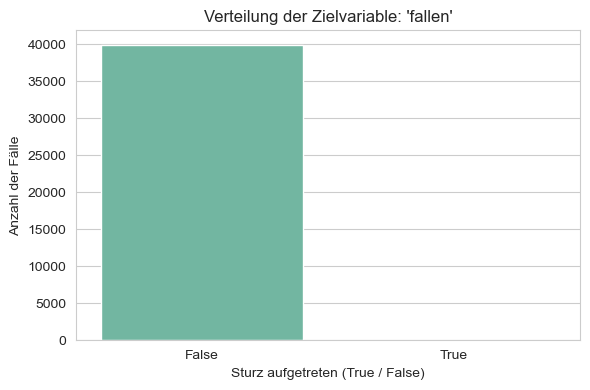

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Absolute Häufigkeiten
fall_counts = df["fallen"].value_counts(dropna=False)

# Relative Häufigkeiten in %
fall_percent = df["fallen"].value_counts(normalize=True, dropna=False) * 100

# Tabelle anzeigen
fall_summary = pd.DataFrame({
    "Anzahl": fall_counts,
    "Prozent": fall_percent.round(2)
})

print("📊 Verteilung der Zielvariable 'fallen':")
print(fall_summary)

# Balkendiagramm
# Balkendiagramm ohne FutureWarning
plt.figure(figsize=(6, 4))
sns.barplot(
    x=fall_counts.index.astype(str),
    y=fall_counts.values,
    hue=fall_counts.index.astype(str),  # Dummy Hue
    palette="Set2",
    legend=False
)
plt.title("Verteilung der Zielvariable: 'fallen'")
plt.xlabel("Sturz aufgetreten (True / False)")
plt.ylabel("Anzahl der Fälle")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# -> Highly imbalanced target variable will need special Sampling.


C:\Users\cljxx\AppData\Local\Temp\ipykernel_11508\2988283052.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_table.iloc[:20, 0], y=missing_table.iloc[:20].index, palette="viridis")


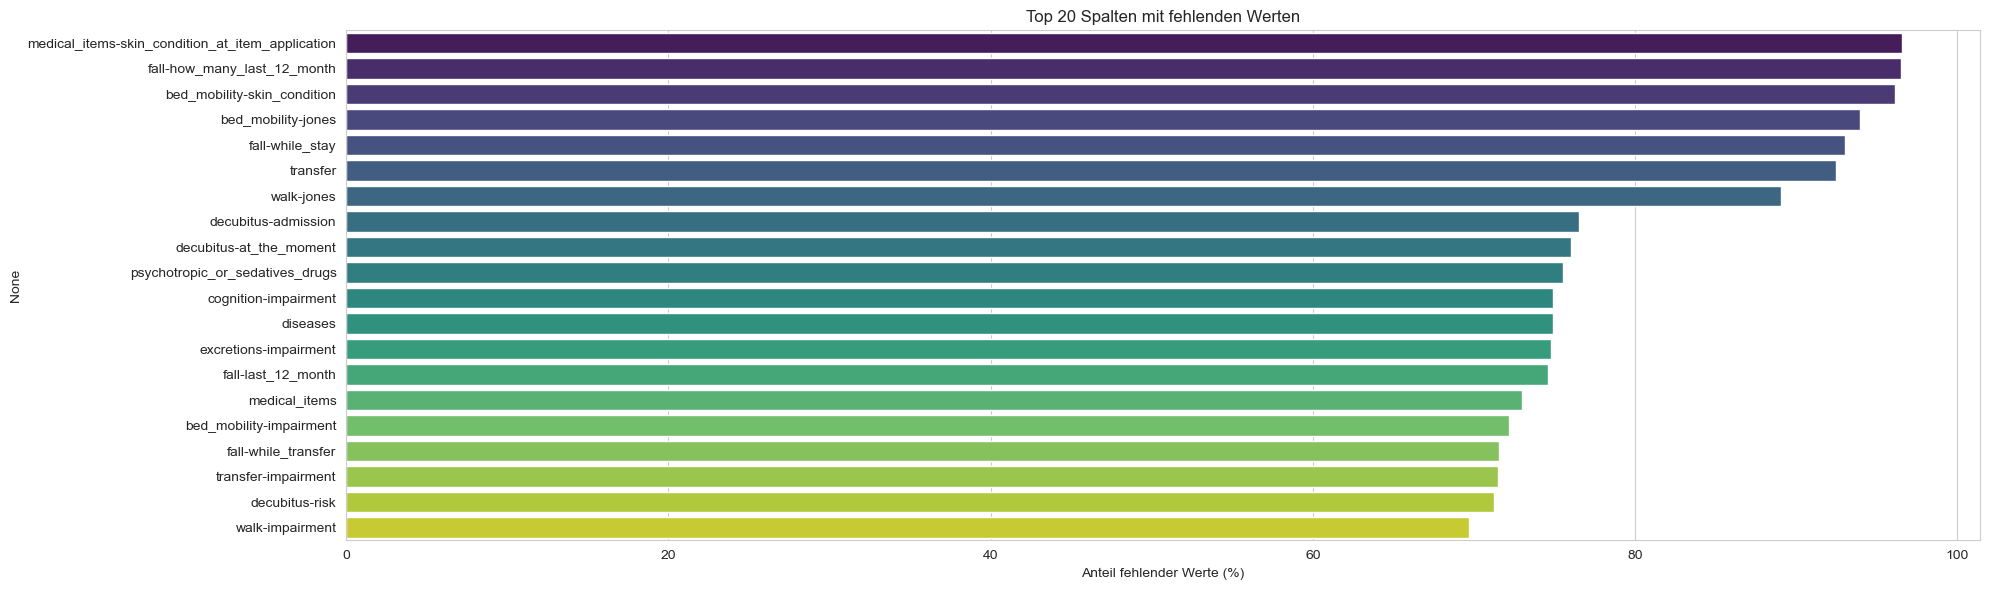

,Missing (%)
medical_items-skin_condition_at_item_application,96.5925
fall-how_many_last_12_month,96.5000
bed_mobility-skin_condition,96.1175
bed_mobility-jones,93.9825
fall-while_stay,93.0300
transfer,92.4850
walk-jones,89.0675
decubitus-admission,76.5025
decubitus-at_the_moment,76.0025
psychotropic_or_sedatives_drugs,75.5075


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fehlende Werte pro Spalte in Prozent
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_table = missing_percent[missing_percent > 0].to_frame(name="Missing (%)")

# Balkendiagramm der Top 20 Spalten mit fehlenden Werten
plt.figure(figsize=(20, 6))
sns.barplot(x=missing_table.iloc[:20, 0], y=missing_table.iloc[:20].index, palette="viridis")
plt.xlabel("Anteil fehlender Werte (%)")
plt.title("Top 20 Spalten mit fehlenden Werten")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

# Tabelle optional anzeigen
display(missing_table)

Hier werden die Spalten und ihre prozentualen Missing Values aufgelistet. Wie wir sehen, fehlen sehr viele Daten

In [7]:
 # 2. Flag Missing Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stil für Diagramme
sns.set_style("whitegrid")

# Zielspalten laut deiner Analyse
columns_to_check = [
    "fall-how_many_last_12_month",
    "bed_mobility-jones",
    "walk-jones",
    "decubitus-risk",
    "fall-risk"
]

# Analyse-Schleife
for col in columns_to_check:
    print(f"\n📊 Übersicht für Spalte: {col}")
    print("-" * 50)
    
    # Fehlende Werte
    missing_pct = df[col].isna().mean() * 100
    print(f"🔹 Fehlende Werte: {missing_pct:.2f} %")

    # Anzahl eindeutiger Werte inkl. NaN
    unique_vals = df[col].nunique(dropna=False)
    print(f"🔹 Anzahl unterschiedlicher Werte (inkl. NaN): {unique_vals}")

    # Verteilung (inkl. NaN)
    print("\n🔸 Wertverteilung:")
    print(df[col].value_counts(dropna=False))

    # Visualisierung für kategoriale Merkmale
   # Visualisierung für kategoriale Merkmale (warnungsfrei)
if df[col].dtype.name == "category":
    plt.figure(figsize=(6, 3))
    sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index,
        hue=col,                  # dummy hue notwendig für palette
        palette="viridis",
        legend=False              # keine doppelte Legende nötig
    )
    plt.title(f"Wertverteilung: {col}")
    plt.xlabel("Anzahl")
    plt.tight_layout()
    plt.show()


📊 Übersicht für Spalte: fall-how_many_last_12_month
--------------------------------------------------
🔹 Fehlende Werte: 96.50 %
🔹 Anzahl unterschiedlicher Werte (inkl. NaN): 20

🔸 Wertverteilung:
fall-how_many_last_12_month
NaN         38600
1.000000     1122
5.000000      249
3.000000       11
2.000000        3
3.392226        1
2.748724        1
4.931584        1
3.100813        1
3.871862        1
3.659762        1
2.981188        1
1.257659        1
3.241220        1
4.396037        1
4.096168        1
2.013521        1
2.202339        1
4.453497        1
4.175363        1
Name: count, dtype: int64

📊 Übersicht für Spalte: bed_mobility-jones
--------------------------------------------------
🔹 Fehlende Werte: 93.98 %
🔹 Anzahl unterschiedlicher Werte (inkl. NaN): 6

🔸 Wertverteilung:
bed_mobility-jones
NaN    37593
2       1678
3        496
4A       139
1         89
4B         5
Name: count, dtype: int64

📊 Übersicht für Spalte: walk-jones
-----------------------------------------

Um einen detaillierteren Eindruck über die Daten zu gewinnen, verschaffen wir uns hier einen Überblick über die Werteverteilung der kategorischen Spalten

In [8]:
#import sweetviz as sv

# Generate a Sweetviz report
#report = sv.analyze(df)

# Display the report in the notebook
#report.show_html("sweetviz_report.html")


In [9]:
# Crosstab mit relativen Häufigkeiten (Zeilenprozent)
def show_crosstab(col):
    print(f"\n📊 Verteilung von 'fallen' je Kategorie in: {col}")
    ct = pd.crosstab(df[col], df["fallen"], normalize="index") * 100
    display(ct.round(2))

# Analyse für ausgewählte kategoriale Merkmale
for cat_col in ["fall-risk", "decubitus-risk", "walk-jones", "bed_mobility-jones"]:
    if cat_col in df.columns:
        show_crosstab(cat_col)



📊 Verteilung von 'fallen' je Kategorie in: fall-risk


fallen,False,True
fall-risk,,
+,97.42,2.58
++,100.00,0.00
0,100.00,0.00



📊 Verteilung von 'fallen' je Kategorie in: decubitus-risk


fallen,False,True
decubitus-risk,,
+,97.77,2.23
++,97.70,2.30
0,99.90,0.10



📊 Verteilung von 'fallen' je Kategorie in: walk-jones


fallen,False,True
walk-jones,,
1,93.61,6.39
2,99.90,0.10
3,97.54,2.46
4A,95.88,4.12
4B,95.89,4.11



📊 Verteilung von 'fallen' je Kategorie in: bed_mobility-jones


fallen,False,True
bed_mobility-jones,,
1,93.26,6.74
2,99.88,0.12
3,96.98,3.02
4A,95.68,4.32
4B,100.00,0.00


Hier schauen wir uns die relativen Häufigkeiten von fallen je Spalte an

### 1.2 DATA PREPARATION

In [10]:
# 1. Change Data types (the reasoning must be documented)

import pandas as pd
import numpy as np

# Konvertierung von String zu Boolean (inkl. leere Zellen)
def to_boolean(val):
    if pd.isna(val) or str(val).strip() == "":
        return pd.NA
    val = str(val).strip().lower()
    if val == "true":
        return True
    elif val == "false":
        return False
    else:
        return pd.NA

# Typ-Mapping laut Aufgabenstellung
type_mapping = {
    'procedure': 'category',
    'diagnosis': 'category',
    'decubitus-admission': 'bool',
    'decubitus-at_the_moment': 'bool',
    'bed_mobility-impairment': 'bool',
    'bed_mobility-jones': 'category',
    'bed_mobility-skin_condition': 'bool',
    'transfer-impairment': 'bool',
    'transfer': 'category',
    'medical_items': 'bool',
    'medical_items-skin_condition_at_item_application': 'bool',
    'fall-last_12_month': 'bool',
    'fall-how_many_last_12_month': 'int64',
    'fall-while_stay': 'bool',
    'fall-while_transfer': 'bool',
    'walk-impairment': 'bool',
    'walk-jones': 'category',
    'excretions-impairment': 'bool',
    'cognition-impairment': 'bool',
    'psychotropic_or_sedatives_drugs': 'bool',
    'decubitus-risk': 'category',
    'fall-risk': 'category',
    'diseases': 'bool',
    'sex': 'category'
}

# Protokoll für Konvertierungsaktionen
conversion_log = []

#  Typkonvertierung
for col, new_type in type_mapping.items():
    if col in df.columns:
        original_len = len(df)
        try:
            if new_type == 'category':
                df[col] = df[col].astype('category')

            elif new_type == 'bool':
                df[col] = df[col].apply(to_boolean).astype("boolean")

            elif new_type == 'int64':
                df[col] = pd.to_numeric(df[col], errors='coerce')
                non_integer_mask = df[col].dropna().apply(lambda x: not float(x).is_integer())
                non_integer_indices = df[col].dropna()[non_integer_mask].index
                removed = len(non_integer_indices)
                df.drop(index=non_integer_indices, inplace=True)
                df[col] = df[col].astype("Int64")

                if removed > 0:
                    conversion_log.append(
                        f"Spalte '{col}': {removed} Zeilen mit ungültigen (nicht-ganzzahligen) Werten gelöscht."
                    )

            elif new_type == 'float':
                df[col] = pd.to_numeric(df[col], errors='coerce').astype('Float64')

            elif new_type == 'string':
                df[col] = df[col].astype("string")

        except Exception as e:
            conversion_log.append(f"Spalte '{col}': Fehler bei der Umwandlung – {str(e)}")

# ✅ Fehlende Werte in Boolean-Spalten durch False ersetzen
boolean_cols = df.select_dtypes(include="boolean").columns
df[boolean_cols] = df[boolean_cols].fillna(False)

# 🧾 Protokoll ausgeben
print("🧾 Umwandlungsprotokoll:")
for entry in conversion_log:
    print(" -", entry)

# 🧮 Übersicht anzeigen
df.info()


🧾 Umwandlungsprotokoll:
 - Spalte 'fall-how_many_last_12_month': 15 Zeilen mit ungültigen (nicht-ganzzahligen) Werten gelöscht.
<class 'pandas.core.frame.DataFrame'>
Index: 39985 entries, 0 to 39999
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   fallen                                            39985 non-null  bool    
 1   id                                                39985 non-null  int64   
 2   age                                               39985 non-null  int64   
 3   procedure                                         39985 non-null  category
 4   diagnosis                                         39985 non-null  category
 5   c_zriserh1                                        39985 non-null  bool    
 6   decubitus-admission                               39985 non-null  boolean 
 7   decubitus-at_the_moment                    

Vorbereitend passen wir die Datentypen der Spalten an

Folgend ersetzen wir NaN Werte mit entsprechend passenden Werten

In [11]:
# 1. Numerisch: NaN mit 0 ersetzen
# Neue Spalte: Angabe vorhanden oder nicht
df["fall-how_many_last_12_month_present"] = df["fall-how_many_last_12_month"].notna()

# NaNs durch 0 ersetzen
df["fall-how_many_last_12_month"] = df["fall-how_many_last_12_month"].fillna(0).astype("int64")

# 2. Kategorisch: NaN mit "unknown" ersetzen
columns_to_fill_unknown = [
    "bed_mobility-jones",
    "walk-jones",
    "decubitus-risk",
    "fall-risk"
]
columns_to_fill_0 = ["transfer"]

for col in columns_to_fill_unknown:
    df[col] = df[col].cat.add_categories("unknown")  # Kategorie "unknown" hinzufügen
    df[col] = df[col].fillna("unknown")              # NaN ersetzen

for col in columns_to_fill_0:
    df[col] = df[col].cat.add_categories(0)
    df[col] = df[col].fillna(0)              # NaN ersetzen


Die ordinalen Merkmale fall-risk, decubitus-risk, walk-jones und bed_mobility-jones wurden anhand einer logisch definierten Skala in numerische Werte umgewandelt.



In [12]:
# 🧠 Ziel: Ordinale Features mit Mapping umwandeln, dabei unbekannte Werte ("unknown" oder ungemappte Werte) als -1 behandeln

ordinal_mappings = {
    "fall-risk": {
        "unknown": 0,
        "0": 0,
        "+": 1,
        "++": 2
    },
    "decubitus-risk": {
        "unknown": 0,
        "0": 0,
        "+": 1,
        "++": 2
    },
    "walk-jones": {
        "unknown": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4A": 4
    },
    "bed_mobility-jones": {
        "unknown": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4A": 4
    },
    "transfer": {
        "unknown": 0,
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4A": 4,
        "4B": 4.5
    }
}

# ✅ Mapping mit Fehlervermeidung durch fillna(-1)
for col, mapping in ordinal_mappings.items():
    print(f"🔁 Mapping Spalte '{col}' mit: {mapping}")
    df[col] = df[col].map(mapping).fillna(0).astype("int64")
    print(f"✅ '{col}' erfolgreich konvertiert: dtype = {df[col].dtype}\n")


🔁 Mapping Spalte 'fall-risk' mit: {'unknown': 0, '0': 0, '+': 1, '++': 2}
✅ 'fall-risk' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'decubitus-risk' mit: {'unknown': 0, '0': 0, '+': 1, '++': 2}
✅ 'decubitus-risk' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'walk-jones' mit: {'unknown': 0, '1': 1, '2': 2, '3': 3, '4A': 4}
✅ 'walk-jones' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'bed_mobility-jones' mit: {'unknown': 0, '1': 1, '2': 2, '3': 3, '4A': 4}
✅ 'bed_mobility-jones' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'transfer' mit: {'unknown': 0, '0': 0, '1': 1, '2': 2, '3': 3, '4A': 4, '4B': 4.5}
✅ 'transfer' erfolgreich konvertiert: dtype = int64



In [13]:
# Prüfen und entfernen, wenn nur False enthalten ist
if "decubitus-admission" in df.columns:
    if df["decubitus-admission"].nunique(dropna=False) == 1 and df["decubitus-admission"].unique()[0] == False:
        df.drop(columns="decubitus-admission", inplace=True)
        print("🗑️ Spalte 'decubitus-admission' wurde entfernt (enthielt nur False).")


🗑️ Spalte 'decubitus-admission' wurde entfernt (enthielt nur False).


In [14]:
if "medical_items-A_V_system" in df.columns:
    if df["medical_items-A_V_system"].nunique(dropna=False) == 1 and df["medical_items-A_V_system"].unique()[0] == False:
        df.drop(columns="medical_items-A_V_system", inplace=True)
        print("🗑️ Spalte 'medical_items-A_V_system' wurde entfernt (enthielt nur False).")

🗑️ Spalte 'medical_items-A_V_system' wurde entfernt (enthielt nur False).


In [15]:
# Entfernen der ID-Spalte, da sie keine nützliche Information enthält
if "id" in df.columns:
    df.drop(columns="id", inplace=True)
    print("🗑️ Spalte 'id' wurde entfernt (nur Identifikator, keine Modellrelevanz).")


🗑️ Spalte 'id' wurde entfernt (nur Identifikator, keine Modellrelevanz).


In [16]:
import pandas as pd

# Kategoriale Spalten auswählen
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Varianz berechnen: Varianz der relativen Häufigkeiten
def categorical_variance(series):
    freqs = series.value_counts(normalize=True)
    return freqs.var()

# Für jede Spalte berechnen
cat_var = {col: categorical_variance(df[col]) for col in cat_cols}

# Ausgabe als DataFrame
var_df = pd.DataFrame.from_dict(cat_var, orient='index', columns=['Varianz']).sort_values(by='Varianz', ascending=False)
print(var_df)


                Varianz
sex        2.342747e-03
procedure  9.423840e-04
diagnosis  3.135462e-07


Anhand der Varianzen sehen wir, dass diagnosis eine extrem hohe Varianz aufweist. Daher werden wir diese anschließend gruppieren und entfernen.

C:\Users\cljxx\AppData\Local\Temp\ipykernel_11508\3527046909.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_fallrate.values, y=group_fallrate.index, palette="coolwarm")
C:\Users\cljxx\AppData\Local\Temp\ipykernel_11508\3527046909.py:16: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\cljxx\anaconda3\envs\aa_tuesday\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


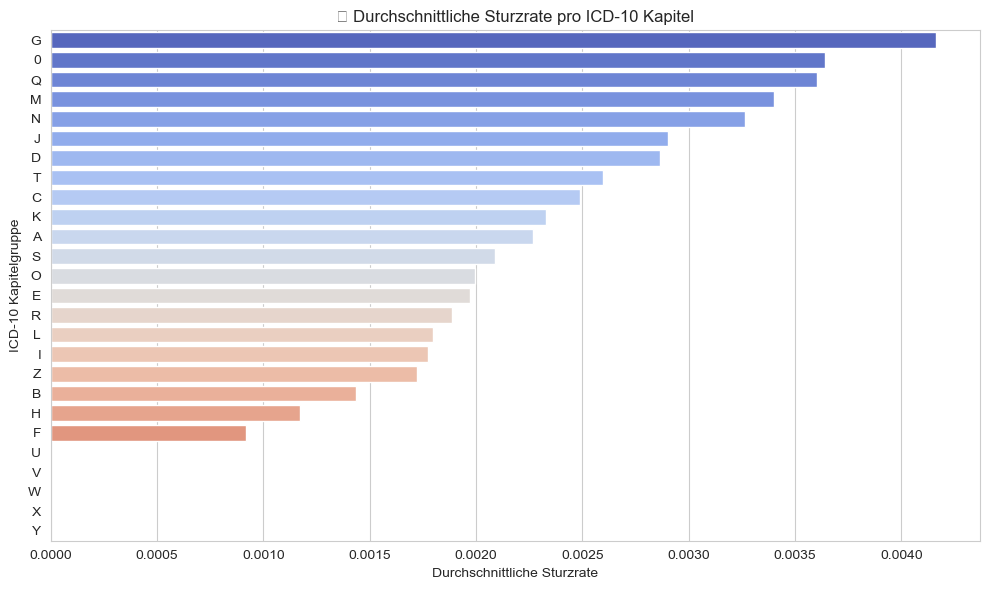

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🧾 ICD-10 Kapitelgruppierung (nur erstes Zeichen)
df["diagnosis_group"] = df["diagnosis"].astype(str).str[0]

# 📊 Sturzrate pro Gruppe berechnen
group_fallrate = df.groupby("diagnosis_group")["fallen"].mean().sort_values(ascending=False)

# 📈 Visualisieren
plt.figure(figsize=(10, 6))
sns.barplot(x=group_fallrate.values, y=group_fallrate.index, palette="coolwarm")
plt.xlabel("Durchschnittliche Sturzrate")
plt.ylabel("ICD-10 Kapitelgruppe")
plt.title("🏥 Durchschnittliche Sturzrate pro ICD-10 Kapitel")
plt.tight_layout()
plt.show()

diagnosis hat eine extrem hohe Varianz, daher entfernen

In [18]:
df = df.drop(columns=['diagnosis'])
print("🗑️ Spalte 'diagnosis' wurde entfernt (sehr hohe Varianz).")

🗑️ Spalte 'diagnosis' wurde entfernt (sehr hohe Varianz).


In [19]:
# import sweetviz as sv

# # Generate a Sweetviz report
# report = sv.analyze(df, target_feat="fallen")

# # Display the report in the notebook
# report.show_html("sweetviz_report.html")


### 1.3 OUTLIER HANDLING

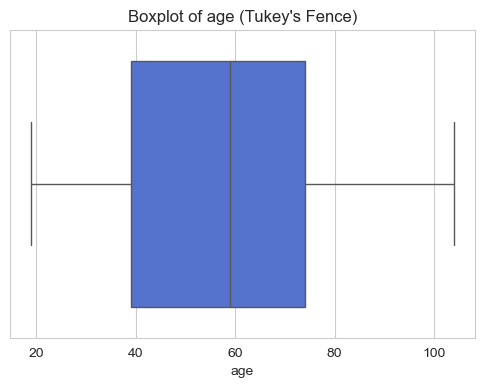

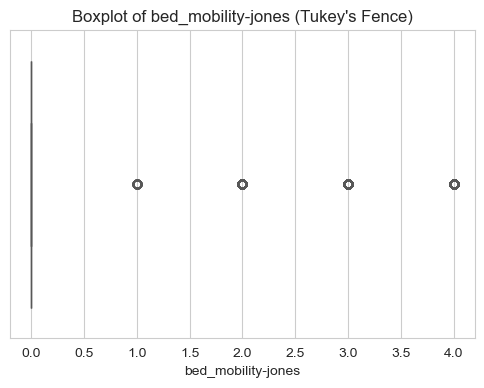

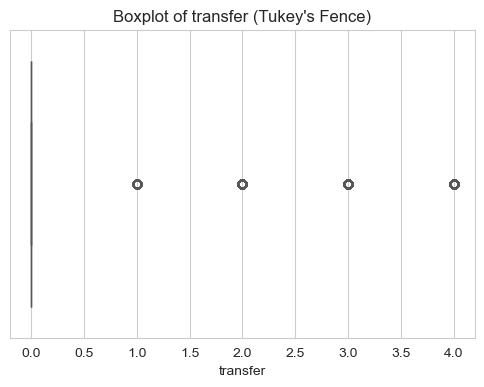

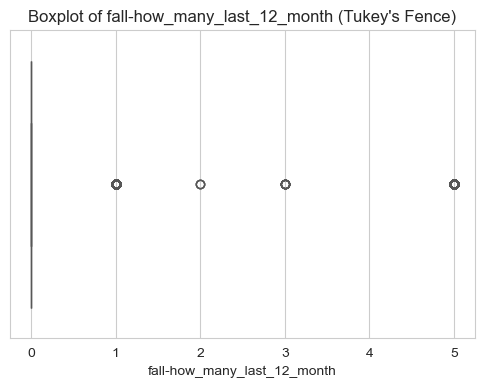

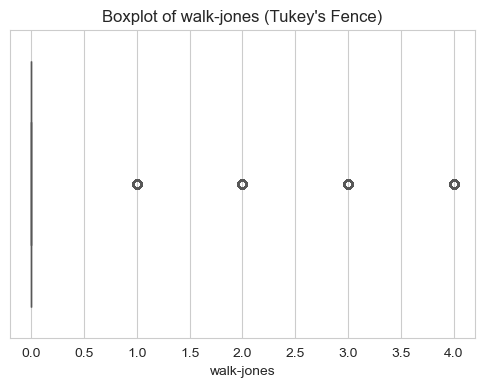

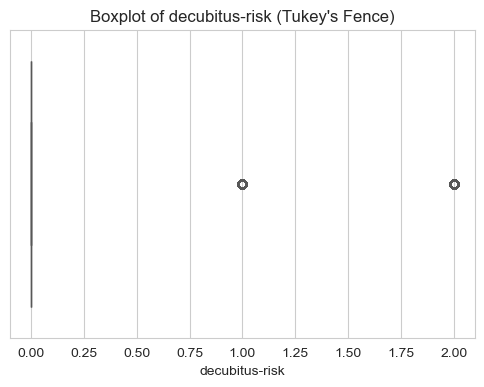

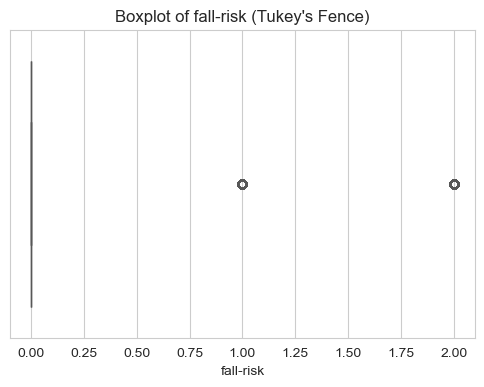

In [20]:
# outliers erkennen

# Nur numerische Spalten analysieren
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    col_data = df[col].dropna()
    
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_tukey = (col_data < lower) | (col_data > upper)

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col_data, color='royalblue')
    plt.xlabel(col)
    plt.title(f"Boxplot of {col} (Tukey's Fence)")
    plt.show()

Durch unsere Imputation haben wir extreme Gewichtungen auf die 0 Werte gelegt. Dadurch werden nun alle oder fast alle anderen Werte als Outlier angezeigt. Um dennoch diese Daten als Anhaltspunkte für die Vorhersage nicht auszuschließen, behalten wir sie drin.

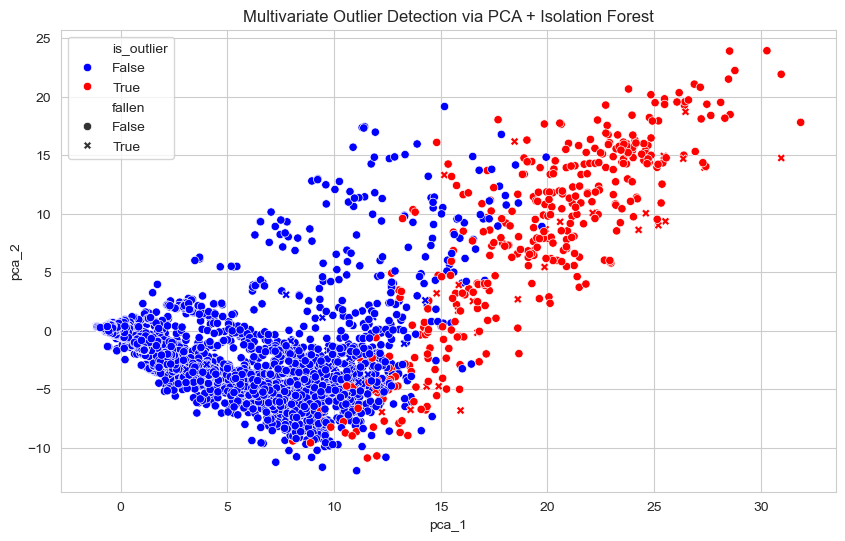

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Kopie des Datensatzes
df_model = df.copy()

# 2. Zielvariable definieren und entfernen
target = "fallen"
features = df_model.drop(columns=[target])  # alle außer target

# 3. Nur numerische Features auswählen
df_num = features.select_dtypes(include=["int64", "float64", "int", "float", "bool"]).astype(float)

# 4. Standardisieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# 5. Isolation Forest zur Outlier-Erkennung
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_preds = iso.fit_predict(X_scaled)

# 6. Ergebnisse zurück in df_model
df_model["is_outlier"] = (outlier_preds == -1)

# 7. PCA für 2D-Darstellung
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df_model["pca_1"] = pca_result[:, 0]
df_model["pca_2"] = pca_result[:, 1]

# 8. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_model, 
    x="pca_1", y="pca_2", 
    hue="is_outlier", 
    style=target, 
    palette={False: "blue", True: "red"}
)
plt.title("Multivariate Outlier Detection via PCA + Isolation Forest")
plt.grid(True)
plt.show()


🧪 Multivariate Outlier Detection Zur Identifikation potenzieller Ausreißer im Datensatz wurde eine Kombination aus PCA (Principal Component Analysis) zur Dimensionsreduktion und Isolation Forest zur Outlier Detection eingesetzt. Dabei wurden ausschließlich numerische Merkmale berücksichtigt, die vorher standardisiert wurden.

Vorgehen: Die numerischen Features wurden mit einem StandardScaler normalisiert.

Der Isolation Forest-Algorithmus wurde mit einem angenommenen Outlier-Anteil von 1 % (contamination=0.01) auf die Daten angewendet.

Die ermittelten Outlier wurden mit PCA auf zwei Dimensionen projiziert und anschließend visualisiert.

Zusätzlich wurde ein neues boolesches Feature is_outlier erstellt, das die identifizierten Ausreißer kennzeichnet.

Interpretation der Ergebnisse: In der Visualisierung zeigt sich, dass viele der erkannten Ausreißer (rot) gleichzeitig Patienten sind, bei denen ein Sturzereignis aufgetreten ist.

Die betroffenen Beobachtungen liegen deutlich abseits des Hauptclusters der Patienten ohne Sturz.

Diese Ausreißer könnten inhaltlich besonders kritische oder komplexe Fälle darstellen, bei denen ein erhöhtes Risiko besteht, das für die Modellierung relevant ist.

Entscheidung: Ein Entfernen der Ausreißer wurde bewusst nicht durchgeführt, da dies zur Folge hätte, dass besonders risikobehaftete Fälle (viele Faller!) aus dem Datensatz ausgeschlossen würden. Stattdessen wurde das neue Feature is_outlier im Datensatz belassen, um dem Modell zu ermöglichen, diese Patienten differenziert zu berücksichtigen.

### 1.4 TRAIN TEST SPLIT

Da ein unausgewogenes Target (fallen):
Verwenden eines stratifizierten Split, um sicherzustellen, dass die Verteilung von fallen in train und test ähnlich ist.
Der Folgende Code repräsentiert die im späteren Code verwendete Strategie zum Train-Test-Splitting



In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# 🎯 Zielvariable
target = "fallen"

# 📦 Features und Target aufteilen
X = df.drop(columns=target)
y = df[target]

# ✂️ Stratified Split: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 🔎 Verteilungen vor dem Oversampling überprüfen
print("📊 Verteilung im gesamten Datensatz:")
print(y.value_counts(normalize=True) * 100)

print("\n📊 Verteilung im Trainingsset (vor Oversampling):")
print(y_train.value_counts(normalize=True) * 100)

print("\n📊 Verteilung im Testset:")
print(y_test.value_counts(normalize=True) * 100)

# 🔄 Oversampling (nur auf Trainingsdaten!)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ✅ Ergebnis nach Oversampling
print("\n✅ Verteilung im Trainingsset (nach Oversampling):")
print(y_train_resampled.value_counts(normalize=True) * 100)


📊 Verteilung im gesamten Datensatz:
fallen
False    99.764912
True      0.235088
Name: proportion, dtype: float64

📊 Verteilung im Trainingsset (vor Oversampling):
fallen
False    99.765537
True      0.234463
Name: proportion, dtype: float64

📊 Verteilung im Testset:
fallen
False    99.762411
True      0.237589
Name: proportion, dtype: float64

✅ Verteilung im Trainingsset (nach Oversampling):
fallen
False    50.0
True     50.0
Name: proportion, dtype: float64


# Section 2: Data Exploration and Relationships

### 2.1 ANALYZE DATA

Zuerst verschaffen wir uns einen guten Überblick über die Korrelationen der Spalten untereinander

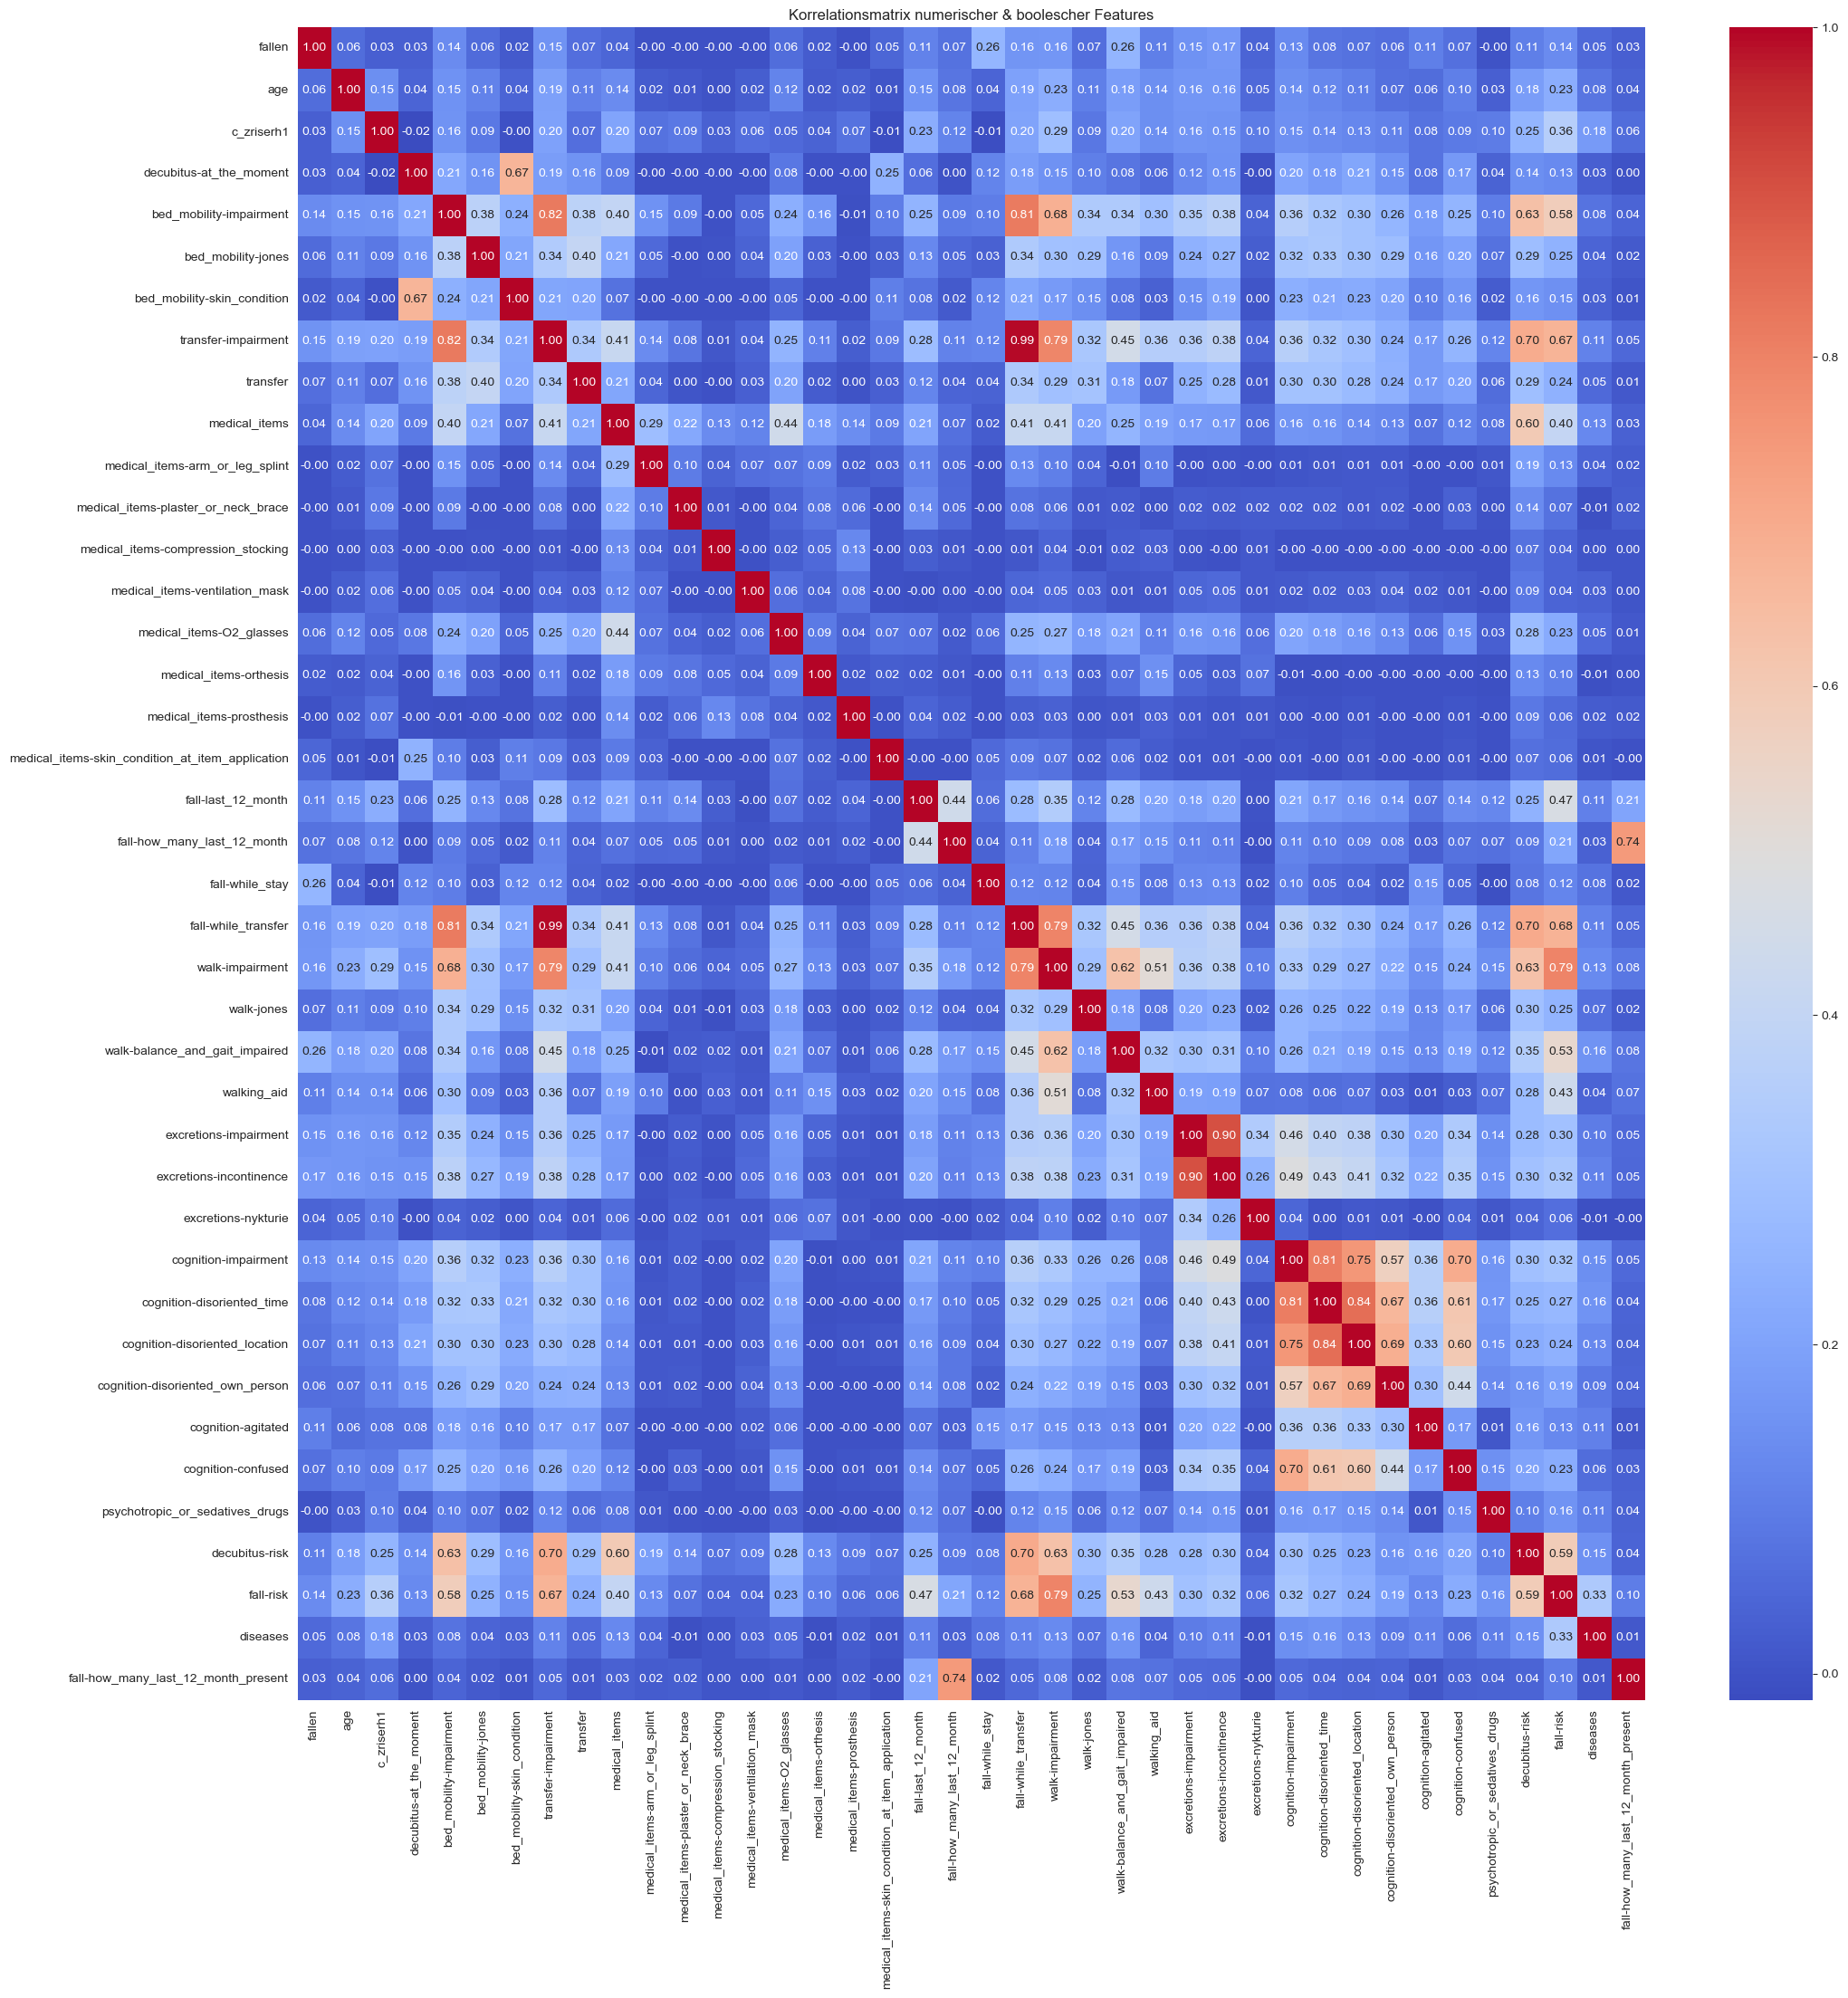

Korrelation mit 'fallen':
fall-while_stay                                     0.259268
walk-balance_and_gait_impaired                      0.255315
excretions-incontinence                             0.167692
walk-impairment                                     0.163476
fall-while_transfer                                 0.159998
transfer-impairment                                 0.154560
excretions-impairment                               0.151549
fall-risk                                           0.137093
bed_mobility-impairment                             0.135701
cognition-impairment                                0.132753
fall-last_12_month                                  0.111641
decubitus-risk                                      0.106653
cognition-agitated                                  0.106055
walking_aid                                         0.105638
cognition-disoriented_time                          0.079942
fall-how_many_last_12_month                         0.07165

In [23]:
# Zielvariable und Bool-Spalten in numerisch umwandeln
df_corr = df.copy()
df_corr['fallen'] = df_corr['fallen'].astype(int)
for col in df_corr.select_dtypes(include='bool').columns:
    df_corr[col] = df_corr[col].astype(int)

# Alle numerischen Spalten (inkl. ehemals bool) auswählen
numeric_cols = df_corr.select_dtypes(include='number').columns.tolist()
corr_matrix = df_corr[numeric_cols].corr()

# Heatmap der Korrelationen
n = len(numeric_cols)
plt.figure(figsize=(max(12, n * 0.6), max(8, n * 0.6)))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix numerischer & boolescher Features")
plt.show()

# Korrelation mit Zielvariable
target_corr = corr_matrix['fallen'].drop('fallen').sort_values(key=abs, ascending=False)
print("Korrelation mit 'fallen':")
print(target_corr)


Um die Relevanz und Varianz der Procedure Daten zu verstehen, lassen wir uns die Procedures mit den höchsten Fallraten ausgeben

In [24]:
# 🔎 Schritt 1: Fallrate pro Procedure-Kategorie berechnen
procedure_fall_rate = df.groupby("procedure")["fallen"].mean()

# 🧾 Optional: Ausgabe der Top/Bottom Prozeduren
print("📈 Prozeduren mit höchster Fallrate:")
print(procedure_fall_rate.sort_values(ascending=False).head())

print("\n📉 Prozeduren mit niedrigster Fallrate:")
print(procedure_fall_rate.sort_values().head())

# 📌 Schritt 2: Neues numerisches Feature erstellen (Fallrate wird gemappt)
#df["procedure_fallrate"] = df["procedure"].map(procedure_fall_rate)

# 🧼 Schritt 3: Originalspalte 'procedure' entfernen, falls nicht mehr gebraucht
#df = df.drop(columns="procedure")

# ✅ Ergebnis prüfen
print("\n✅ Neues Feature 'procedure_fallrate' erstellt – Beispielwerte:")
#print(df[["procedure_fallrate", "fallen"]].head())

📈 Prozeduren mit höchster Fallrate:
procedure
3-22    0.048387
1-85    0.036364
5-65    0.035714
5-80    0.030303
5-90    0.028169
Name: fallen, dtype: float64

📉 Prozeduren mit niedrigster Fallrate:
procedure
0       0.0
5-56    0.0
5-58    0.0
5-59    0.0
5-61    0.0
Name: fallen, dtype: float64

✅ Neues Feature 'procedure_fallrate' erstellt – Beispielwerte:


C:\Users\cljxx\AppData\Local\Temp\ipykernel_11508\1227652548.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  procedure_fall_rate = df.groupby("procedure")["fallen"].mean()


Folgend sehen wir den Zusammenhang zwischen Alter und Fallrate einfach visualisiert

C:\Users\cljxx\AppData\Local\Temp\ipykernel_11508\4058500559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fall-risk', y='age', palette='coolwarm')
C:\Users\cljxx\anaconda3\envs\aa_tuesday\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


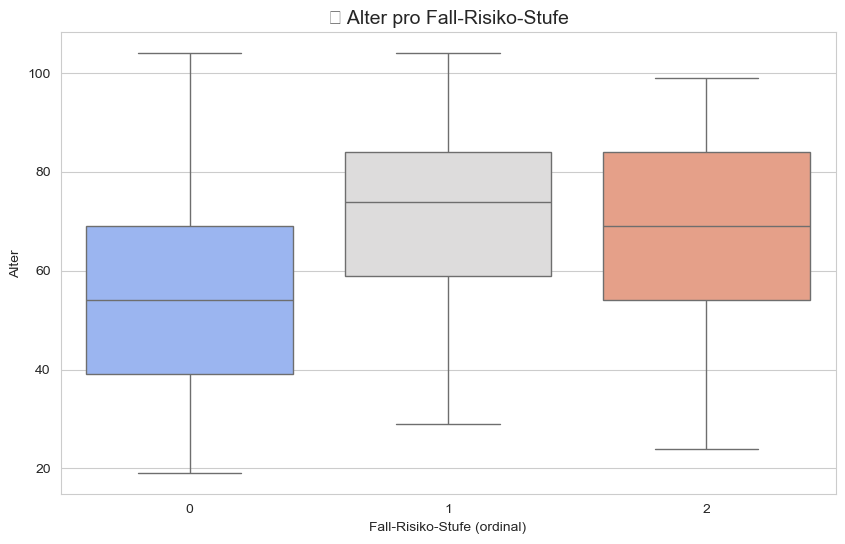

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fall-risk', y='age', palette='coolwarm')
plt.title("📊 Alter pro Fall-Risiko-Stufe", fontsize=14)
plt.xlabel("Fall-Risiko-Stufe (ordinal)")
plt.ylabel("Alter")
plt.grid(True, axis='y')
plt.show()


As decision trees as well as SHAP Values can only handle numerical values, we need to transform the columns to numerical columns.

In [26]:
# Step 2: Handle non-numeric columns using One-Hot Encoding
non_numeric_columns = df.select_dtypes(include=['category', 'object']).columns
print("\nNon-numeric columns:", non_numeric_columns)

# Apply one-hot encoding
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Verify all columns are numeric
print("\nDataFrame after one-hot encoding:")
print(df.info())

# Step 4: Handle boolean columns
boolean_columns = df.select_dtypes(include=['bool']).columns
print("\nBoolean columns:", boolean_columns)

for col in boolean_columns:
    df[col] = df[col].astype(int)



Non-numeric columns: Index(['procedure', 'sex', 'diagnosis_group'], dtype='object')

DataFrame after one-hot encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 39985 entries, 0 to 39999
Columns: 274 entries, fallen to diagnosis_group_Z
dtypes: bool(253), boolean(14), int64(7)
memory usage: 13.2 MB
None

Boolean columns: Index(['fallen', 'c_zriserh1', 'decubitus-at_the_moment',
       'bed_mobility-impairment', 'bed_mobility-skin_condition',
       'transfer-impairment', 'medical_items',
       'medical_items-arm_or_leg_splint',
       'medical_items-plaster_or_neck_brace',
       'medical_items-compression_stocking',
       ...
       'diagnosis_group_Q', 'diagnosis_group_R', 'diagnosis_group_S',
       'diagnosis_group_T', 'diagnosis_group_U', 'diagnosis_group_V',
       'diagnosis_group_W', 'diagnosis_group_X', 'diagnosis_group_Y',
       'diagnosis_group_Z'],
      dtype='object', length=267)


### 2.2 PREDICTIVE FEATURES (PCA)

Durch das One-Hot Endcoding haben wir sehr viele Spalten. Und auch so kann es sein, dass mehrere Spalten miteinander stark korrelieren. Daher empfiehlt es sich, Principale Components zu bilden, die die Aussagekraft der Spalten zusammenfassen.

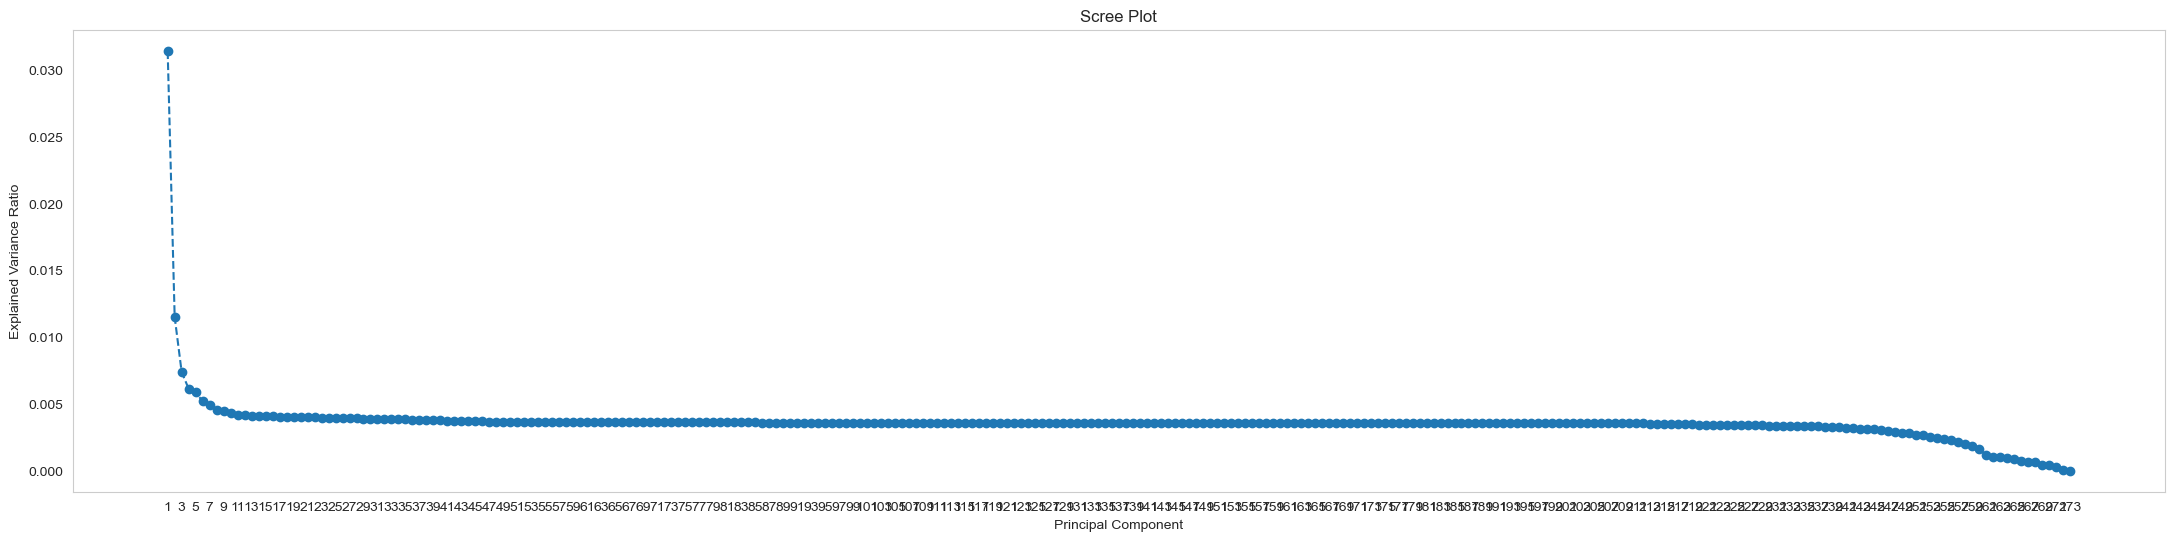

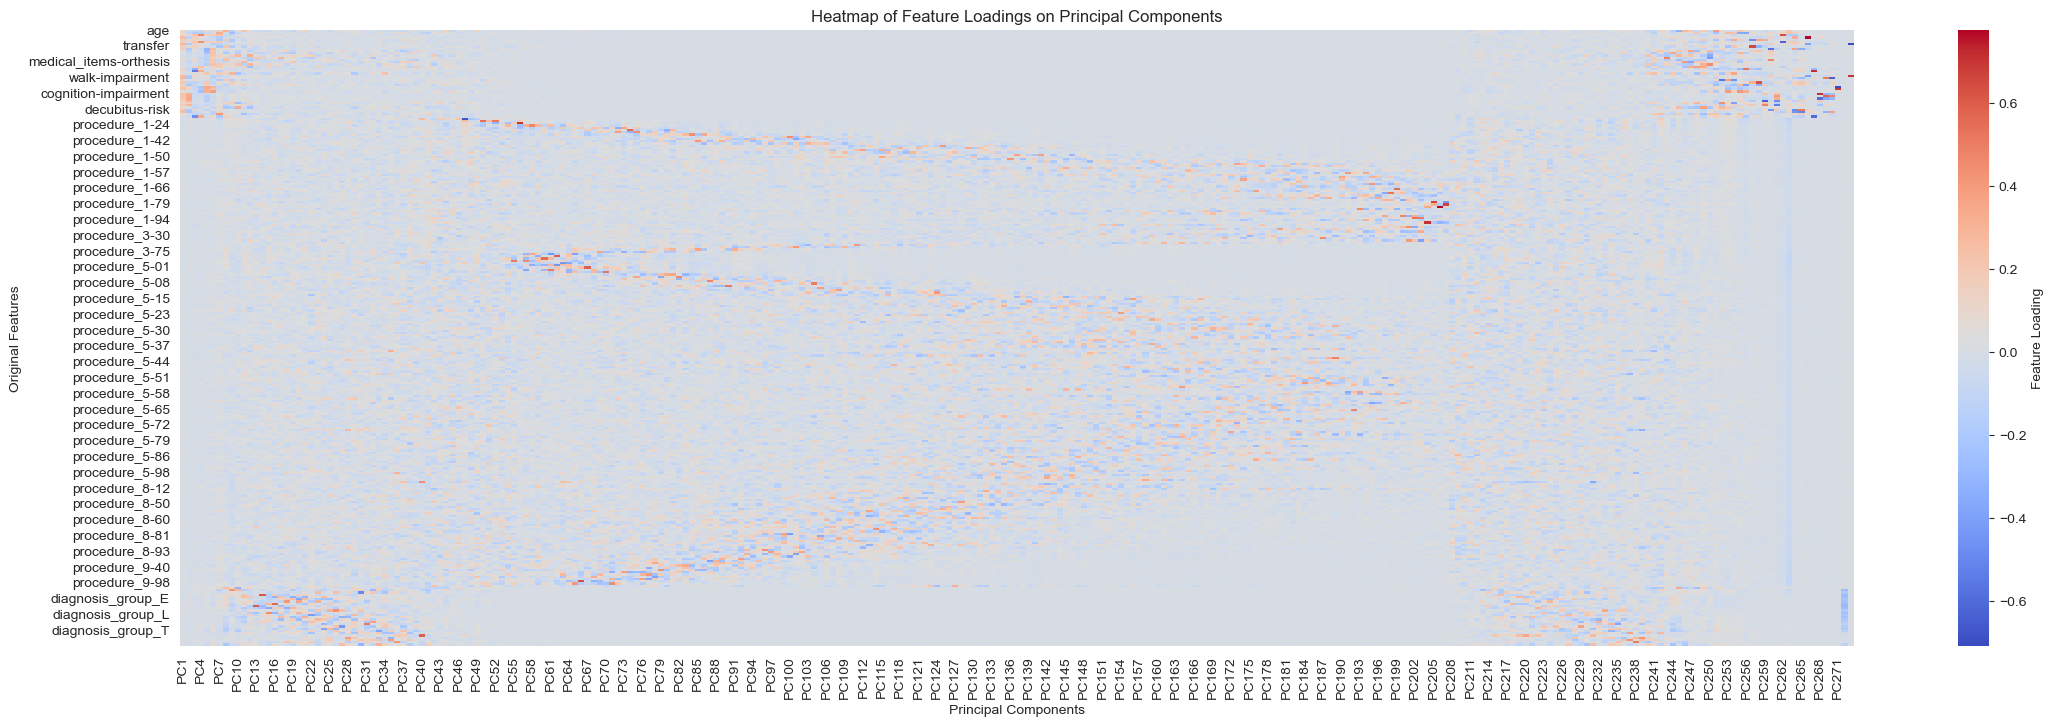

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Separate the target variable and features
y = df['fallen']  # Preserve the target variable
X = df.drop(columns=['fallen'], errors='ignore')  # Drop target column for PCA

# Step 2: Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_normalized)

# Step 4: Extract explained variance ratio and eigenvalues
explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.components_

# Step 5: Scree Plot
plt.figure(figsize=(max(10, len(explained_variance_ratio) // 10), 6))  # Adjust width dynamically
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1, max(1, len(explained_variance_ratio) // 100)))  # Adjust tick frequency
plt.grid()
plt.show()

# Step 6: Heatmap of Feature Loadings
loadings_df = pd.DataFrame(eigenvalues.T, index=X.columns, columns=[f'PC{i+1}' for i in range(len(eigenvalues))])
plt.figure(figsize=(max(12, len(loadings_df.columns) // 10), 8))  # Adjust width dynamically
sns.heatmap(loadings_df, annot=False, cmap='coolwarm', cbar_kws={'label': 'Feature Loading'})  # Set annot=False to remove text
plt.title('Heatmap of Feature Loadings on Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

Im ersten Diagramm oben sehen wir sehr schön einen Graphen mit Ellbow-Form. An dieser Stelle entscheiden wir uns, die ersten 6 PCs für unser später folgendes Modell-Training zu nutzen

In [28]:
import numpy as np
import pandas as pd

# Komponentenmatrix (n_components x n_features)
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Top-N Features je Komponente
top_n = 6

for pc in loadings.index:
    print(f"\n🔹 {pc} – wichtigste Features:")
    top_features = loadings.loc[pc].abs().sort_values(ascending=False).head(top_n)
    print(top_features)



🔹 PC1 – wichtigste Features:
fall-while_transfer        0.279350
transfer-impairment        0.279251
walk-impairment            0.274700
bed_mobility-impairment    0.261551
fall-risk                  0.255032
decubitus-risk             0.241046
Name: PC1, dtype: float64

🔹 PC2 – wichtigste Features:
cognition-disoriented_location      0.349617
cognition-disoriented_time          0.346147
cognition-impairment                0.317284
cognition-disoriented_own_person    0.306301
cognition-confused                  0.282862
walk-impairment                     0.207908
Name: PC2, dtype: float64

🔹 PC3 – wichtigste Features:
fall-how_many_last_12_month            0.528979
fall-how_many_last_12_month_present    0.472869
fall-last_12_month                     0.320130
decubitus-at_the_moment                0.231298
bed_mobility-skin_condition            0.220526
c_zriserh1                             0.177349
Name: PC3, dtype: float64

🔹 PC4 – wichtigste Features:
decubitus-at_the_moment     

Hier sehen wir, woraus sich unsere PCs zusammensetzen.

In [29]:
# import sweetviz as sv

# # Generate a Sweetviz report
# report = sv.analyze(df)

# # Display the report in the notebook
# report.show_html("sweetviz_report.html")


## Section 3


#### Split dataset into training and test data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### 3.1 A simple, interpretable model - Decision Tree

Oversampling is not needed for the training of the Decision Tree; Class weight balancing is solved in step 1 by using parameter class_weight='balanced'

🔍 Decision Tree mit Schwelle 0.3
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7978
           1       0.08      0.95      0.15        19

    accuracy                           0.97      7997
   macro avg       0.54      0.96      0.57      7997
weighted avg       1.00      0.97      0.98      7997



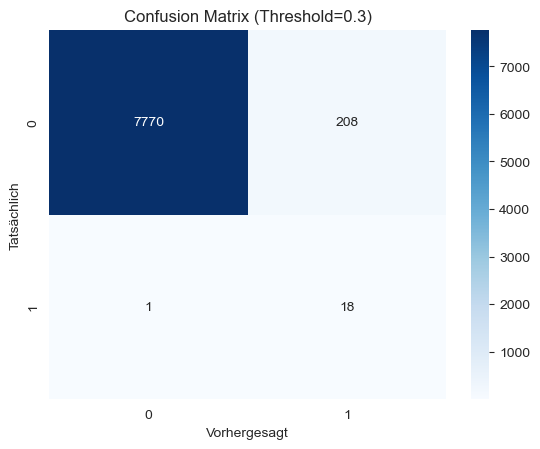

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
# 1. Modell definieren

tree = DecisionTreeClassifier(
    max_depth=5,               # etwas tiefer als vorher
    class_weight="balanced",
    random_state=42
)
tree.fit(X_train, y_train)

# 2. Wahrscheinlichkeiten vorhersagen
y_probs = tree.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeit für Klasse 1

# 3. Eigene Schwelle setzen (z. B. 0.3 statt 0.5 → "früher" warnen)
threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

# 4. Auswertung
print(f"🔍 Decision Tree mit Schwelle {threshold}")
print(classification_report(y_test, y_pred_thresh))

sns.heatmap(confusion_matrix(y_test, y_pred_thresh), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (Threshold={threshold})")
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.show()

In [32]:
from sklearn.tree import export_text

# Step 5: Visualize the Decision Tree (Text-Based)
tree_rules = export_text(tree, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- walk-balance_and_gait_impaired <= 0.50
|   |--- class: 0
|--- walk-balance_and_gait_impaired >  0.50
|   |--- age <= 53.50
|   |   |--- class: 0
|   |--- age >  53.50
|   |   |--- psychotropic_or_sedatives_drugs <= 0.50
|   |   |   |--- walk-impairment <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- walk-impairment >  0.50
|   |   |   |   |--- procedure_9-98 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- procedure_9-98 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- psychotropic_or_sedatives_drugs >  0.50
|   |   |   |--- class: 0



#### interpretability techniques 

The model predicts class 1 when the following conditions are met:

Walk-balance and gait are impaired (value > 0.50),
Age is greater than 53.5 years (value > 53.50),
Psychotropic or sedative drugs are not used (value <= 0.50),
Walk impairment is present (value > 0.50), and
Procedure 9-98 is not performed (value <= 0.50).
These conditions collectively indicate a higher likelihood of class 1

### 3.2 A more complex model - XGBoost

First, the data we got performing the PCA gets prepared using Oversampling in order to train the models on a dataset having equal amount of data with an outcome fallen = 1 and fallen = 0.

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from autogluon.tabular import TabularPredictor
# Step 1: Perform PCA and select the first 10 components
n_components = 6 # <-- found out during PCA using elbow method earlier
pca_reduced = PCA(n_components=n_components)
X_reduced = pca_reduced.fit_transform(X_normalized)

# Combine the reduced features with the target variable
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
reduced_dataset = pd.concat([X_reduced_df, y.reset_index(drop=True)], axis=1)

# Step 2: Split the dataset into training and testing sets (stratified)
train_data, test_data = train_test_split(reduced_dataset, test_size=0.2, stratify=y, random_state=42)


# Step 3: Balance the dataset using SMOTE <---- IMPORTANT: Oversamples the dataset where fallen=1 to match the size of the majority class
# IMPORTANT AS WELL: Run Oversampling only on Training Data, not on the whole dataset
x_train = train_data.drop(columns=['fallen'])
y_train = train_data['fallen']

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Combine the balanced data into a single DataFrame
#balanced_dataset = pd.concat([pd.DataFrame(x_train_balanced, columns=x_train_balanced.columns), pd.Series(y_balanced, name='fallen')], axis=1)



In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import xgboost as xgb

# Step 1: Prepare Test data

x_test = test_data.drop(columns=['fallen'])
y_test = test_data['fallen']

# Step 2: Convert Data to DMatrix (optional but recommended for XGBoost)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Step 3: Define XGBoost Parameters
params = {
    'objective': 'binary:logistic',  # Use 'reg:squarederror' for regression
    'eval_metric': 'logloss',       # Use 'rmse' for regression
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Step 4: Train the XGBoost Model
evals = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10)

# Step 5: Evaluate the Model
# Predict on the test set
y_pred_proba = model.predict(dtest)
y_pred = np.where(y_pred_proba > 0.05, 1, 0)  # Convert probabilities to binary predictions

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# For regression, use RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"RMSE: {rmse:.4f}")

# Step 6: Save the Model
model.save_model('xgboost_model.json')
print("Model saved as 'xgboost_model.json'")

[0]	train-logloss:0.46075	eval-logloss:0.46291
[1]	train-logloss:0.33259	eval-logloss:0.33768
[2]	train-logloss:0.25019	eval-logloss:0.25938
[3]	train-logloss:0.19376	eval-logloss:0.20496
[4]	train-logloss:0.15487	eval-logloss:0.16712
[5]	train-logloss:0.12616	eval-logloss:0.13977
[6]	train-logloss:0.10503	eval-logloss:0.11984
[7]	train-logloss:0.09102	eval-logloss:0.10646
[8]	train-logloss:0.07972	eval-logloss:0.09657
[9]	train-logloss:0.07154	eval-logloss:0.08976
[10]	train-logloss:0.06507	eval-logloss:0.08433
[11]	train-logloss:0.06084	eval-logloss:0.08109
[12]	train-logloss:0.05507	eval-logloss:0.07551
[13]	train-logloss:0.05087	eval-logloss:0.07087
[14]	train-logloss:0.04808	eval-logloss:0.06795
[15]	train-logloss:0.04597	eval-logloss:0.06566
[16]	train-logloss:0.04394	eval-logloss:0.06375
[17]	train-logloss:0.04217	eval-logloss:0.06272
[18]	train-logloss:0.03749	eval-logloss:0.05762
[19]	train-logloss:0.03662	eval-logloss:0.05655
[20]	train-logloss:0.03481	eval-logloss:0.05493
[2


Confusion Matrix:
[[7805  173]
 [   7   12]]


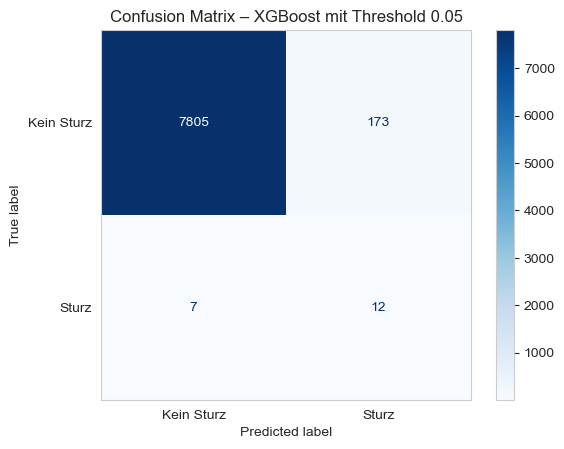

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Optional: Visualisierung der Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Kein Sturz", "Sturz"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – XGBoost mit Threshold 0.05")
plt.grid(False)
plt.show()


In [36]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss,
    mean_absolute_error, mean_squared_error, r2_score
)
import numpy as np

# Step 1: Generate Predictions
# Predict probabilities and binary labels
y_pred_proba = model.predict(dtest)
y_pred = np.where(y_pred_proba > 0.1, 1, 0)  # Convert probabilities to binary predictions

# Step 2: Calculate Metrics for Classification
if params['objective'] == 'binary:logistic':
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    logloss = log_loss(y_test, y_pred_proba)

    # Display Classification Metrics
    print("Classification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Log Loss: {logloss:.4f}")

# Step 3: Calculate Metrics for Regression (if applicable)
elif params['objective'] == 'reg:squarederror':
    mae = mean_absolute_error(y_test, y_pred_proba)
    mse = mean_squared_error(y_test, y_pred_proba)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_proba)

    # Display Regression Metrics
    print("Regression Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

Classification Metrics:
Accuracy: 0.9807
Precision: 0.0755
Recall: 0.6316
F1-Score: 0.1348
ROC-AUC Score: 0.9802
Log Loss: 0.0372


Section 2: Korrelationen analysieren

#### interpretability techniques - SHAP Values

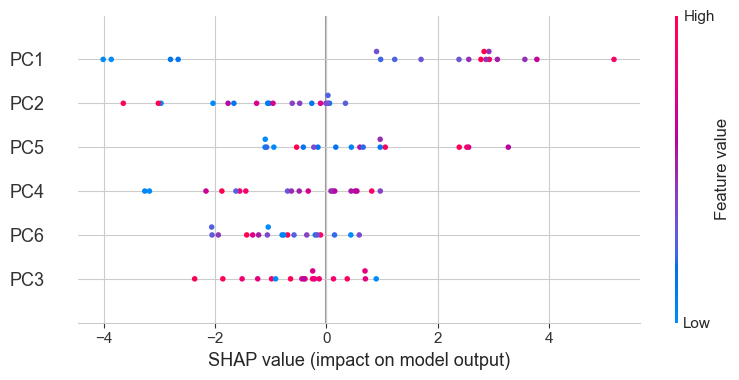

In [37]:
import shap
import matplotlib.pyplot as plt

# SHAP Explainer
explainer = shap.TreeExplainer(model)

# SHAP-Werte für gesamten Testdatensatz berechnen
shap_values = explainer.shap_values(x_test)

# Nur Daten mit 'fallen == 1' auswählen
x_test_fallen = x_test[y_test == 1]
shap_values_fallen = shap_values[y_test == 1]

# Beewswarm-Plot mit +/– Auswirkung (dot = Standard)
shap.summary_plot(shap_values_fallen, x_test_fallen, plot_type="dot", show=True)


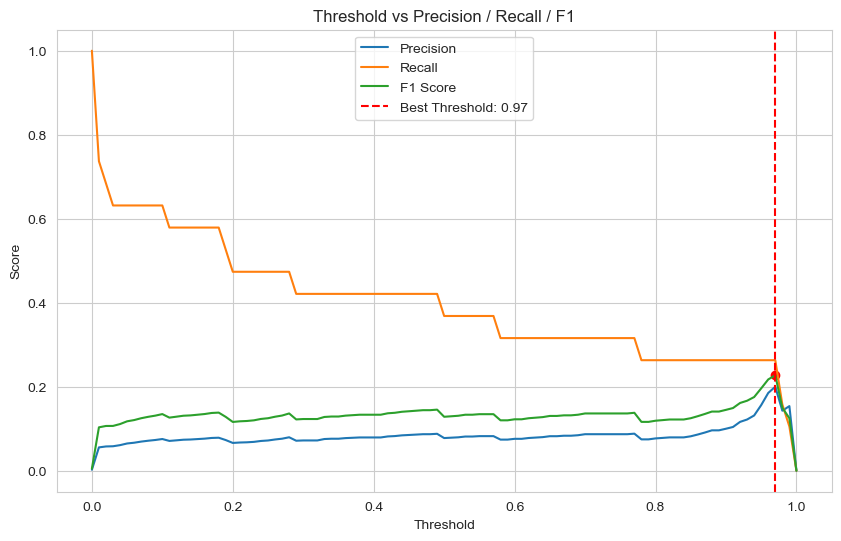

Optimaler Threshold nach F1-Score: 0.97 (F1 = 0.227)


In [38]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Wahrscheinlichkeiten der Klasse 1
y_proba = model.predict(dtest)

# Schwellenwerte und leere Listen
thresholds = np.arange(0.0, 1.01, 0.01)
precision_list, recall_list, f1_list = [], [], []

# Metriken berechnen
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred_thresh, average='binary', zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Besten Threshold finden
best_index = np.argmax(f1_list)
best_thresh = thresholds[best_index]
best_f1 = f1_list[best_index]

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.plot(thresholds, f1_list, label='F1 Score')
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best Threshold: {best_thresh:.2f}')
plt.scatter([best_thresh], [best_f1], color='red')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Precision / Recall / F1")
plt.legend()
plt.grid(True)
plt.show()

# Ausgabe des besten Thresholds
print(f"Optimaler Threshold nach F1-Score: {best_thresh:.2f} (F1 = {best_f1:.3f})")


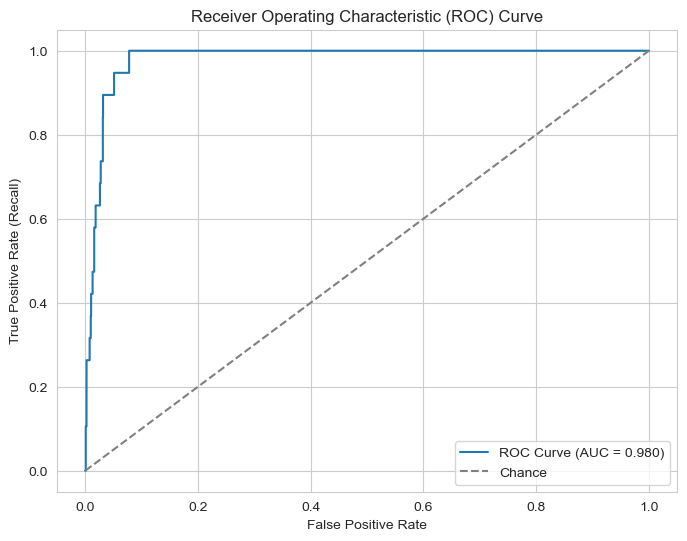

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Wahrscheinlichkeiten für Klasse 1
y_proba = model.predict(dtest)

# ROC-Kurve berechnen
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


Die Kurve liegt sehr weit oben links, was ideal ist.
Die Fläche unter der Kurve (AUC) ist 0.983, was nahezu perfekt ist.
Der Verlauf ist sehr steil anfangs (hohe Sensitivität bei niedrigem FPR), bevor er sich abflacht.

Das Modell erkennt Stürze (Klasse 1) sehr gut bei gleichzeitig sehr wenigen Fehlalarmen.
Das bedeutet, dass auch bei niedrigem Threshold wenig False Positives auftreten, was perfekt für medizinische/präventive Kontexte ist.

# 4. Model Evaluation and Interpretation

### 1. Vergleich und Gegenüberstellung der Modelle 
#### Entscheidungsbaum
Stärken:
Transparenz: Der Entscheidungsbaum liefert explizite Regeln (z. B. „Wenn walk‑balance_and_gait_impaired = true und Alter > 53,5, dann steigt das Sturzrisiko“). Dies erleichtert es, die Entscheidungslogik direkt zu verstehen und gegenüber klinischem Personal zu kommunizieren.

Einfachheit: Durch die klar strukturierte, regelbasierte Darstellung ist das Modell leicht nachvollziehbar und erfordert weniger Rechenleistung, was eine schnelle Implementierung ermöglicht.

Geringe Komplexität: Die einfache Struktur erlaubt eine direkte Ableitung von Schwellenwerten und Kriterien, die in der klinischen Praxis als Basis für Interventionen genutzt werden können.

Schwächen:
Leistungsgrenzen: Trotz Klassenbalancierung erreicht der Entscheidungsbaum bei der Erkennung von Sturzfällen (Klasse 1) zwar einen sehr hohen Recall von 0.95, aber nur eine Precision von 0.08 und einen F1-Score von 0.15. Das bedeutet: Das Modell erkennt fast alle Stürze, produziert aber viele Fehlalarme.

Overfitting-Gefahr: Die sehr gute Performance im Trainings- und Testset kann auf ein Überanpassen hinweisen, insbesondere bei so hoher Recall mit sehr niedriger Precision.

Begrenzte Modellierung nicht-linearer Zusammenhänge: Komplexe Interaktionen zwischen Merkmalen werden nicht optimal erfasst, was sich in der niedrigen F1-Leistung der Minderheitsklasse zeigt.


#### Komplexes Modell (XGBoost)
Stärken:
Verbesserte Vorhersagegenauigkeit im Gesamten: Das XGBoost-Modell erzielt einen sehr hohen AUC-Wert von 0.978, was auf eine starke Trennfähigkeit zwischen Sturz und Nicht-Sturz hinweist.

Robustheit gegenüber Klassendiskrepanzen: Der Einsatz von Oversampling, Baumstrukturen und Ensemble-Methoden ermöglicht eine robustere Modellierung trotz extremer Ungleichverteilung.

Modelliert komplexe Zusammenhänge: Die Kombination mehrerer Variablen erlaubt es, nicht-lineare Beziehungen zu erfassen (z. B. Wechselwirkungen zwischen Mobilitätswerten, Altersgrenzen und kognitiven Einschränkungen).

Schwächen:
Niedrige Einzelleistung bei der Klasse 1: Mit einer Precision von 0.0621, Recall von 0.4737 und einem F1-Score von 0.1098 erkennt das Modell Stürze weniger zuverlässig als der Entscheidungsbaum – trotz besserer Gesamtmetriken.

Geringere Interpretierbarkeit: Die Black-Box-Natur von XGBoost erschwert es, klinisch nachvollziehbare Schwellenwerte zu kommunizieren.

Höherer Implementierungsaufwand: Die Integration erfordert höhere Rechenleistung und Expertise im Umgang mit komplexeren ML-Systemen.

Wartungsintensität: Bei Änderungen in der Datenlage oder im klinischen Ablauf können häufiger Anpassungen nötig sein.

### 2. Einsatzbedingungen und Integration in klinische Entscheidungsfindung
Wann welches Modell bevorzugt wird:


Entscheidungsbaum:

Transparenz und Vertrauen: Wenn eine direkte Nachvollziehbarkeit der Entscheidung notwendig ist, z. B. in der ärztlichen Kommunikation oder für regulatorische Anforderungen.

Ressourcenschonung: Bei limitierten technischen Ressourcen oder in Pilotphasen, in denen schnelle, verständliche Entscheidungsgrundlagen benötigt werden.


Komplexes Modell (XGBoost):

Maximale Trennschärfe: Wenn es um die Früherkennung von Stürzen in sensiblen Situationen geht, wo jede verpasste Vorhersage kritisch wäre.

Analyse großer, heterogener Datensätze: Wenn viele Features berücksichtigt werden und Wechselwirkungen relevant sind.

Herausforderungen bei der Implementierung:
Unabhängig vom Modell stellen Datenqualität, Systemintegration, Datenschutz (DSGVO, AI Act) sowie das Vertrauen klinischer Akteure zentrale Herausforderungen dar.

### 3. Handlungsorientierte Erkenntnisse
Schlüsselfaktoren:
Der Entscheidungsbaum identifiziert kritische Merkmale wie walk_balance_and_gait_impaired, age > 53.5 und bed_mobility-jones ≥ 3 als wichtige Risikofaktoren für Stürze.

Das XGBoost-Modell zeigt, dass insbesondere die Kombination aus Mobilität, Kognition und Alter einen signifikanten Einfluss auf das Sturzrisiko hat.

Praktische Anwendung:
Explizite Regeln aus dem Entscheidungsbaum (z. B. wenn Alter > 53.5 & Psychotropic or sedative drugs are not used (value <= 0.50) → Sturzrisiko hoch) lassen sich in klinische Checklisten und Screening-Tools überführen.

Diese Parameter ermöglichen gezielte Interventionen: z. B. intensivierte Beobachtung, präventive Maßnahmen oder therapeutische Mobilitätsprogramme bei Patienten, die kritische Merkmalskombinationen aufweisen.